In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('/content/healthcare-dataset-stroke-data.csv')

In [3]:
df.head(2)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1


In [4]:
df.shape

(5110, 12)

In [5]:
df.info() # 3l4an a4of hal fi null values w la l2

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [6]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [7]:
df.describe(include='O')

,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


In [8]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [9]:
df.bmi.isnull().sum()

201

In [10]:
df.loc[df.bmi.isnull()]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
13,8213,Male,78.0,0,1,Yes,Private,Urban,219.84,NaN,Unknown,1
19,25226,Male,57.0,0,1,No,Govt_job,Urban,217.08,NaN,Unknown,1
27,61843,Male,58.0,0,0,Yes,Private,Rural,189.84,NaN,Unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5039,42007,Male,41.0,0,0,No,Private,Rural,70.15,NaN,formerly smoked,0
5048,28788,Male,40.0,0,0,Yes,Private,Urban,191.15,NaN,smokes,0
5093,32235,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,NaN,smokes,0
5099,7293,Male,40.0,0,0,Yes,Private,Rural,83.94,NaN,smokes,0


<Axes: xlabel='age', ylabel='bmi'>

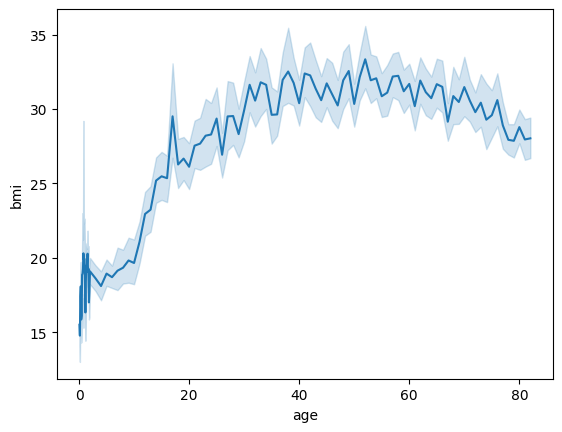

In [11]:
sns.lineplot(x=df['age'],y=df['bmi'])

In [12]:
df.bmi.fillna(df.bmi.median(),inplace=True)

<ipython-input-13-e994eb1f2e97>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df['bmi'],shade=True)


<Axes: xlabel='bmi', ylabel='Density'>

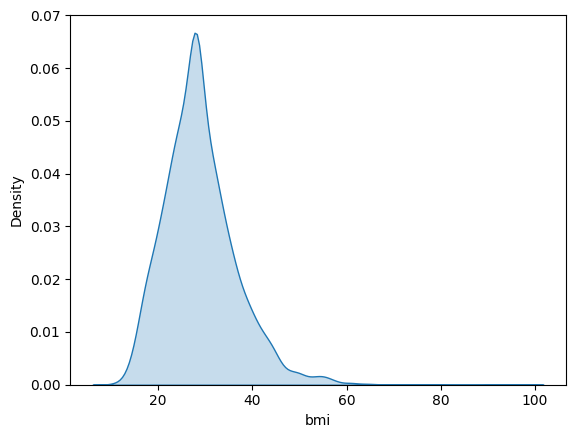

In [13]:
sns.kdeplot(data=df['bmi'],shade=True)

In [14]:
df.select_dtypes(include=['O', 'category']).columns

Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')

In [15]:
from sklearn.preprocessing import OneHotEncoder
df = pd.get_dummies(df, columns=['work_type'])
df = pd.get_dummies(df, columns=['smoking_status'])
df = pd.get_dummies(df, columns=['Residence_type'])
df = pd.get_dummies(df, columns=['ever_married'])
df = pd.get_dummies(df, columns=['gender'])

In [16]:
df.head(2)

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,...,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,Residence_type_Rural,Residence_type_Urban,ever_married_No,ever_married_Yes,gender_Female,gender_Male,gender_Other
0,9046,67.0,0,1,228.69,36.6,1,0,0,1,...,1,0,0,0,1,0,1,0,1,0
1,51676,61.0,0,0,202.21,28.1,1,0,0,0,...,0,1,0,1,0,0,1,1,0,0


In [17]:
df.select_dtypes(include=['O', 'category']).columns

Index([], dtype='object')

In [18]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
min_max_scaled_data =min_max_scaler.fit_transform(df[['age', 'avg_glucose_level', 'bmi']])

In [19]:
pd.DataFrame(min_max_scaled_data)

,0,1,2
0,0.816895,0.801265,0.301260
1,0.743652,0.679023,0.203895
2,0.975586,0.234512,0.254296
3,0.597168,0.536008,0.276060
4,0.963379,0.549349,0.156930
...,...,...,...
5105,0.975586,0.132167,0.203895
5106,0.987793,0.323516,0.340206
5107,0.426270,0.128658,0.232532
5108,0.621582,0.513203,0.175258


In [20]:
bf = df
bf.loc[:, ['age', 'avg_glucose_level', 'bmi']] = df[['age', 'avg_glucose_level', 'bmi']]
bf

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,...,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,Residence_type_Rural,Residence_type_Urban,ever_married_No,ever_married_Yes,gender_Female,gender_Male,gender_Other
0,9046,67.0,0,1,228.69,36.6,1,0,0,1,...,1,0,0,0,1,0,1,0,1,0
1,51676,61.0,0,0,202.21,28.1,1,0,0,0,...,0,1,0,1,0,0,1,1,0,0
2,31112,80.0,0,1,105.92,32.5,1,0,0,1,...,0,1,0,1,0,0,1,0,1,0
3,60182,49.0,0,0,171.23,34.4,1,0,0,1,...,0,0,1,0,1,0,1,1,0,0
4,1665,79.0,1,0,174.12,24.0,1,0,0,0,...,0,1,0,1,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,80.0,1,0,83.75,28.1,0,0,0,1,...,0,1,0,0,1,0,1,1,0,0
5106,44873,81.0,0,0,125.20,40.0,0,0,0,0,...,0,1,0,0,1,0,1,1,0,0
5107,19723,35.0,0,0,82.99,30.6,0,0,0,0,...,0,1,0,1,0,0,1,1,0,0
5108,37544,51.0,0,0,166.29,25.6,0,0,0,1,...,1,0,0,1,0,0,1,0,1,0


In [21]:
import plotly.express as px
fig = px.parallel_coordinates(bf, color='stroke')
fig.show()

In [22]:
x= bf.drop(['stroke','id'],axis=1)
y = bf['stroke']
x

,age,hypertension,heart_disease,avg_glucose_level,bmi,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,...,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,Residence_type_Rural,Residence_type_Urban,ever_married_No,ever_married_Yes,gender_Female,gender_Male,gender_Other
0,67.0,0,1,228.69,36.6,0,0,1,0,0,...,1,0,0,0,1,0,1,0,1,0
1,61.0,0,0,202.21,28.1,0,0,0,1,0,...,0,1,0,1,0,0,1,1,0,0
2,80.0,0,1,105.92,32.5,0,0,1,0,0,...,0,1,0,1,0,0,1,0,1,0
3,49.0,0,0,171.23,34.4,0,0,1,0,0,...,0,0,1,0,1,0,1,1,0,0
4,79.0,1,0,174.12,24.0,0,0,0,1,0,...,0,1,0,1,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,80.0,1,0,83.75,28.1,0,0,1,0,0,...,0,1,0,0,1,0,1,1,0,0
5106,81.0,0,0,125.20,40.0,0,0,0,1,0,...,0,1,0,0,1,0,1,1,0,0
5107,35.0,0,0,82.99,30.6,0,0,0,1,0,...,0,1,0,1,0,0,1,1,0,0
5108,51.0,0,0,166.29,25.6,0,0,1,0,0,...,1,0,0,1,0,0,1,0,1,0


In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [24]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [25]:
# Predict on a new dataset (e.g., your test data)
y_pred = logistic_model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [26]:
from sklearn.metrics import accuracy_score
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.5f}')

Accuracy: 0.93933


In [27]:
logistic_model.score(X_train, y_train)

0.9542563600782779